In [1]:
#DATS 6103 – Individual Project 1 – Vishnupriya Venkateswaran
#This project is done to study the military expenditure across differnt countries,their share of GDP 
#and military expenditure and GDP per capita.

In [2]:
#Install python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import math
import plotly
import plotly.plotly as py

In [3]:
#sign into plotly
py.sign_in('vishnupriya2604','n4j2DIaxDt1NpQbC2R7i') #plotly API connection
print(plotly.__version__)
plotly.offline.init_notebook_mode() 

2.4.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
pd.set_option('display.precision',2)

In [5]:
#Load the csv files and create the data frame for military spending, share of gdp, per capita and gdp per capita
#1.Military Expenditure
military_expenditure = pd.read_csv('MilitaryExpense.csv',',',index_col=0)
#2.Share of GDP for military expenditure
share_of_gdp = pd.read_csv('ShareOfGDP.csv',',',index_col=0)
#3.Military expenditure per capita
military_percapita = pd.read_csv('PerCapita.csv',',',index_col=0)
#4.GDP per capiata
gdp_percapita = pd.read_csv('GDPperCapita.csv',',',index_col=0)

In [6]:
#For this project I have choosen G-20 countries from the period 2007 to 2016
#Setting variables for G-20 countries and years, which is common for all 4 datasets used.
years_filter=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
country_filter=['Argentina', 
 'Australia', 
 'Brazil', 
 'Canada', 
 'China, P.R.', 
 'France', 
 'Germany', 
 'India', 
 'Indonesia', 
 'Italy', 
 'Japan', 
 'Mexico', 
 'Russian Federation', 
 'Saudi Arabia', 
 'South Africa', 
 'Korea, South', 
 'Turkey', 
 'UK', 
 'USA']

In [7]:
#Filter the required Countries from 2007 to 2016 military expenditure data to perform analysis
military_expenditure_filtered=pd.DataFrame(military_expenditure.filter(years_filter))

military_expense=pd.DataFrame(military_expenditure_filtered.filter(country_filter,axis=0))

military_expense.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Argentina,2296,2789,2982,3475,4052,4563,5138,4979,5483,5209
Australia,17186,18633,18960,23218,26597,26217,24825,25784,24040,24617
Brazil,20486,24453,25649,34003,36936,33987,32875,32660,24618,23676
Canada,17417,19342,18936,19316,21394,20452,18516,17854,15317,15157
"China, P.R.",68012,86362,105644,115712,137967,157390,179880,200772,214093,215176


In [8]:
#Finding the data types of the data set
military_expense.dtypes

2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
dtype: object

In [9]:
#Converting the dataset to int uing the years and country variables
for year in years_filter:
    military_expense[year]=military_expense[year].astype(int)

#The values of military expense dataset are in millions. For easier and uniform analysis, I'am converting millions to billions across the dataset
military_expense=military_expense.apply(lambda x: x/1000)
military_expense.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Argentina,2.30,2.79,2.98,3.48,4.05,4.56,5.14,4.98,5.48,5.21
Australia,17.19,18.63,18.96,23.22,26.60,26.22,24.82,25.78,24.04,24.62
Brazil,20.49,24.45,25.65,34.00,36.94,33.99,32.88,32.66,24.62,23.68
Canada,17.42,19.34,18.94,19.32,21.39,20.45,18.52,17.85,15.32,15.16
"China, P.R.",68.01,86.36,105.64,115.71,137.97,157.39,179.88,200.77,214.09,215.18


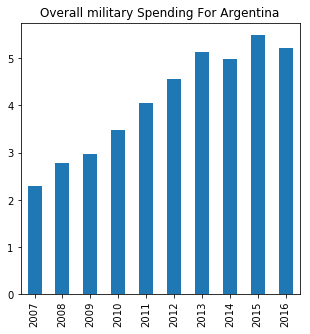

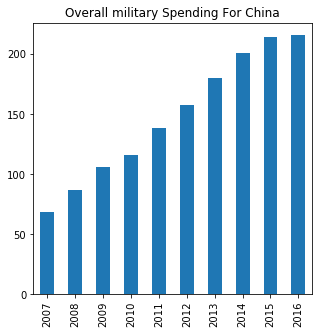

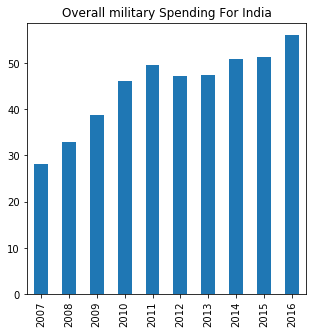

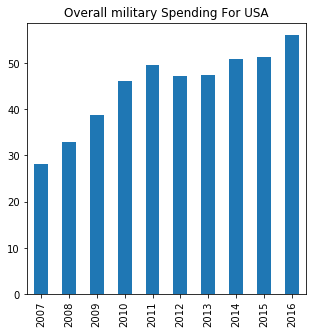

In [10]:
#Some plots to find out the overall expenditures over the years 2007 and 2016
transpose=military_expense.transpose()

#1. Argentina 
arg_data=transpose['Argentina']
arg_data.plot(kind='bar',figsize=(5,5),stacked=False,title='Overall military Spending For Argentina')
plt.show()
#So we can see from the bar gragh that the military expenditure is highest for the year 2015

#2.China
china_data=transpose['China, P.R.']
china_data.plot(kind='bar',figsize=(5,5),stacked=False,title='Overall military Spending For China')
plt.show()

#We can see that in the year 2016 military expenditure was the highest.
#the expenditure for 2015 and 2016 are almost the same and the highest.And the military expenditure has been increasing from 2007 to 2016.

#3.India
india_data=transpose['India']
india_data.plot(kind='bar',figsize=(5,5),stacked=False,title='Overall military Spending For India')
plt.show()

#As seen in the plot, in 2016 the indian military expenditure is the highest. 
#Interesting that in 2012 and 2013 the military expenditure descresed but then it increased from the next 3 years. 

#4.USA

usa_data=transpose['India']
usa_data.plot(kind='bar',figsize=(5,5),stacked=False,title='Overall military Spending For USA')
plt.show()



In [11]:
#Compare the data to the overall military spending of the all 10+ countries
#Find out the overall military spending of all countries
#Create a new data frame and
#Add a new column called total expenditure and add all the years values and place in this column 
df = pd.DataFrame(data=military_expense)
df['Total Expenditure(in bn)'] =df.sum(axis=1)
df.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Expenditure(in bn)
Country,,,,,,,,,,,
Argentina,2.30,2.79,2.98,3.48,4.05,4.56,5.14,4.98,5.48,5.21,40.97
Australia,17.19,18.63,18.96,23.22,26.60,26.22,24.82,25.78,24.04,24.62,230.08
Brazil,20.49,24.45,25.65,34.00,36.94,33.99,32.88,32.66,24.62,23.68,289.34
Canada,17.42,19.34,18.94,19.32,21.39,20.45,18.52,17.85,15.32,15.16,183.70
"China, P.R.",68.01,86.36,105.64,115.71,137.97,157.39,179.88,200.77,214.09,215.18,1481.01


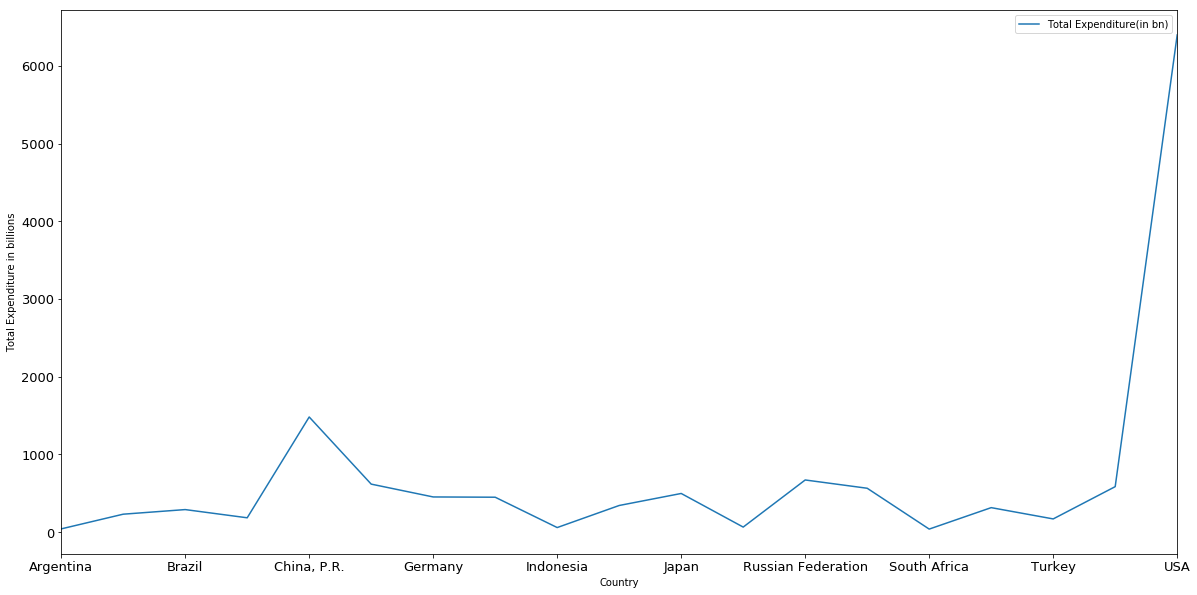

In [12]:
#Plot for showing overall expenditure of all countries from the year 2007 to 2016
ax = df['Total Expenditure(in bn)'].plot(figsize=(20,10),fontsize=13,legend=True)
ax.set_xlabel('Country')
ax.set_ylabel('Total Expenditure in billions')
plt.show()

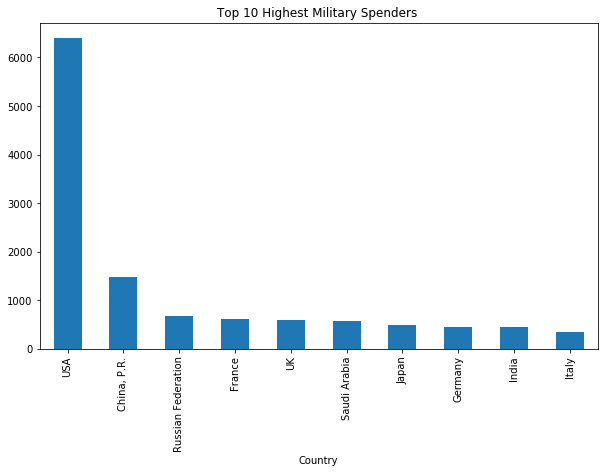

In [13]:
#As seen in graph above USA has the highest military expenditure over the 10 years. 
#To confirm this the data can be sorted
data1=df.sort_values(by='Total Expenditure(in bn)',ascending=False)

#plot representing top 10 highest military spending countries
top_ten=data1.head(10)
top_ten['Total Expenditure(in bn)'].plot(kind='bar', figsize=(10,6), stacked=False,
                                             title='Top 10 Highest Military Spenders ')
plt.show()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



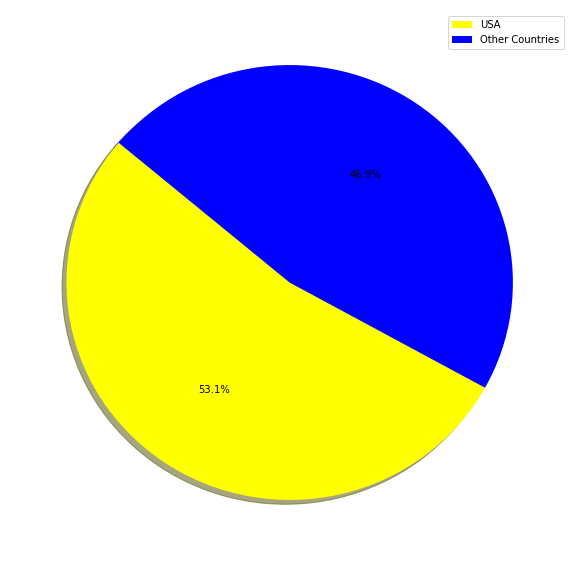

In [14]:
#To represent USA in military spending as percentage we can plot a pie chart
#United States remained at the top of the military spending league from 2007 to 2016. That's 53 percent of all the other considered countries.
data = pd.Series(top_ten.ix[['USA'],['Total Expenditure(in bn)']])


#plot a pie chart
plt.figure(figsize=(10,10))
sizes = [data,(top_ten['Total Expenditure(in bn)']).sum()-data]
labels = ['USA','Other Countries']
colors = ['Yellow','Blue']
plt.pie(sizes,colors=colors,shadow=True,startangle=140,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

In [15]:
#choropleth for total military expenditure for the year 2016
#using plotly to draw a choropleth map of the US

#set scale of color ranges
scale = [[0.0, 'rgb(223,221,228)'],
         [0.2, 'rgb(199,199,216)'],
         [0.4, 'rgb(169,170,201)'],
         [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'],
         [1.0, 'rgb(63,20,122)']]


#dataset to be graphed
dataset = [dict(type='choropleth', locations=list(df.index.values),
                z=military_expense['Total Expenditure(in bn)'],
                autocolorscale = True,
                colorscale = scale,
                locationmode="country names",
                text=list(df.index.values),
                hoverinfo='location+z',
                marker=dict(line=dict(color='rgb(255,255,255)', width=2)),
                colorbar=dict(
            autotick = False,
            tickprefix = '$',
            title = 'Total military expenditure<br>Billions US$'))]

layoutset = dict(title='total military expenditure<br />(Hover Over Country for Rate)',
                 geo=dict(scope='world', projection=dict(type='Mercator'),
                 showlakes = False,
                 lakecolor='rgb(95,145,237)'))

fig = dict(data=dataset, layout=layoutset)
py.iplot(fig, validate=False, filename='df')

In [16]:
#Share Of GDP
#Filtering the required Countries from 2007 to 2016 from share of GDP data to perform analysis
share_of_gdp_filtered=share_of_gdp.filter(years_filter)
Share_ofGDP=share_of_gdp_filtered.filter(country_filter,axis=0)

#Convert the dataset to float and remove the % from the data
for year in years_filter:
    Share_ofGDP[year] = Share_ofGDP[year].str.rstrip('%').astype('float') / 100.0

#Remove the scientific notations from the dataset
pd.options.display.float_format = '{:.4f}'.format

Share_ofGDP.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Argentina,0.0090,0.0080,0.0100,0.0090,0.0090,0.0100,0.0080,0.0090,0.0090,0.0100
Australia,0.0180,0.0180,0.0190,0.0190,0.0180,0.0170,0.0170,0.0180,0.0197,0.0200
Brazil,0.0150,0.0150,0.0160,0.0160,0.0150,0.0150,0.0150,0.0140,0.0139,0.0130
Canada,0.0120,0.0130,0.0140,0.0120,0.0120,0.0110,0.0100,0.0100,0.0099,0.0100
"China, P.R.",0.0190,0.0190,0.0210,0.0190,0.0190,0.0190,0.0190,0.0190,0.0190,0.0190


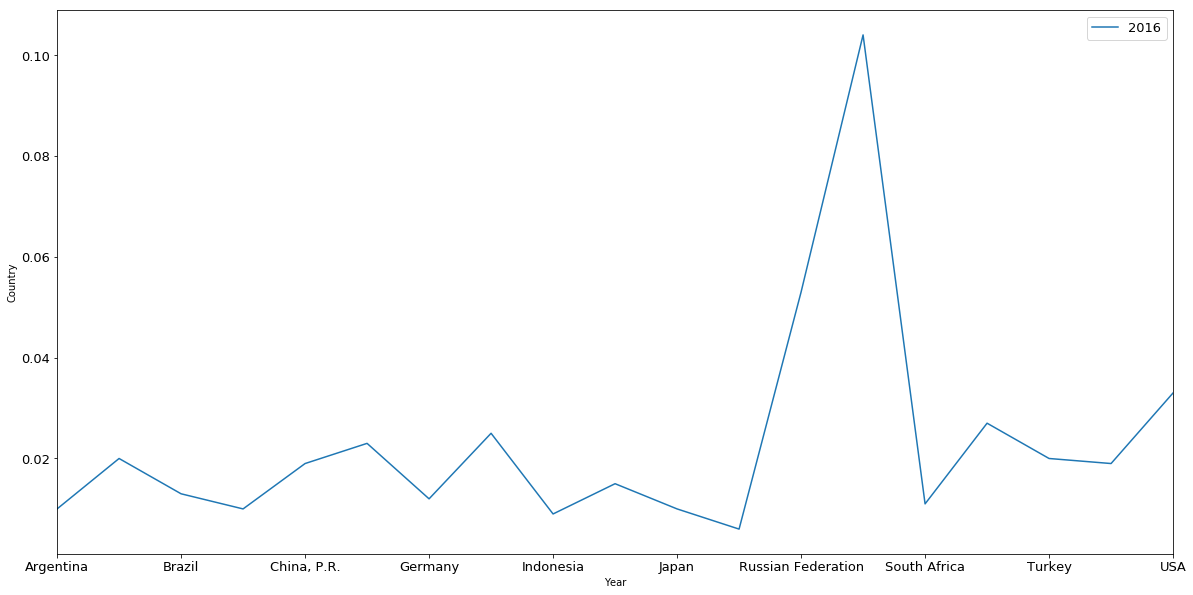

In [17]:
#Plot to show Share of GDP in the year 2016
ax = Share_ofGDP['2016'].plot(figsize=(20,10), fontsize=13, legend=False)
plt.legend(loc='best', fontsize=13)
ax.set_xlabel('Year')
ax.set_ylabel('Country')
plt.show()

In [18]:
#Extracting relevant values
def display_relevant(Share_ofGDP,limit=19):
    display(Share_ofGDP.ix[:,['2016']][:limit])

In [19]:
display_relevant(Share_ofGDP,19)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



,2016
Country,
Argentina,0.0100
Australia,0.0200
Brazil,0.0130
Canada,0.0100
"China, P.R.",0.0190
France,0.0230
Germany,0.0120
India,0.0250
Indonesia,0.0090


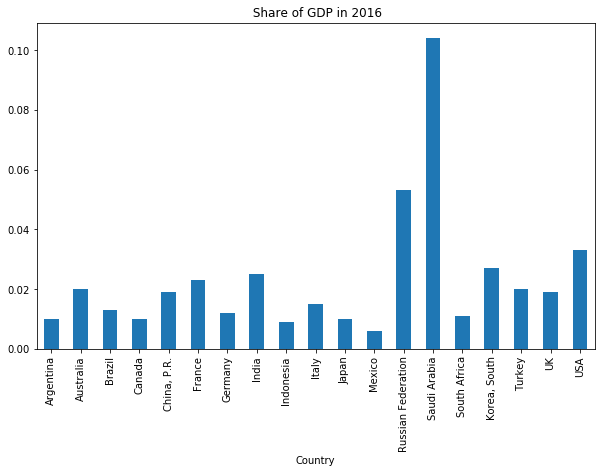

In [20]:
#plot gdp of for 2016
Share_ofGDP['2016'].plot(kind='bar', figsize=(10,6), stacked=False,
                                             title=' Share of GDP in 2016')
plt.show()


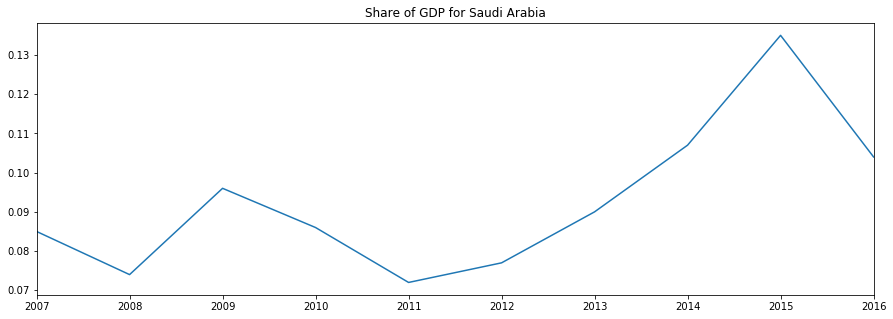

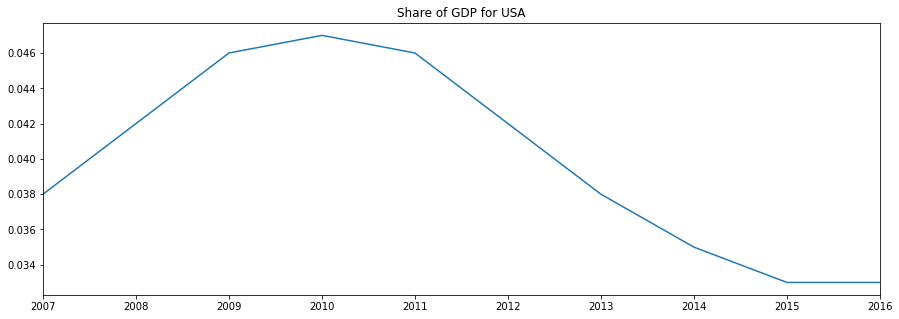

In [21]:
#Plots to show progression over 10 years for Saudi Arabia and USA
transpose=Share_ofGDP.transpose()

saudi_data=transpose['Saudi Arabia']
saudi_data.plot(kind='line',figsize=(15,5),stacked=False,title='Share of GDP for Saudi Arabia')
plt.show()

#For USA
usa_data=transpose['USA']
usa_data.plot(kind='line',figsize=(15,5),stacked=False,title='Share of GDP for USA')
plt.show()

In [22]:
#Filtering required country and years for military per capita data
per_capita_filtered=military_percapita.filter(years_filter)
militaryspending_percapita=per_capita_filtered.filter(country_filter,axis=0)

militaryspending_percapita.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Argentina,57.5,69.1,73.1,84.3,97.3,108.4,120.8,115.9,126.3,118.8
Australia,819.3,871.9,870.9,1047.6,1179.9,1144.3,1066.8,1091.5,1003.0,1012.7
Brazil,106.3,125.5,130.4,171.2,184.2,167.9,160.9,158.5,118.4,113.0
Canada,528.1,579.7,561.1,566.0,620.1,586.6,525.6,501.7,426.2,417.8
"China, P.R.",51.5,65.1,79.2,86.3,102.3,116.1,132.0,146.6,155.6,155.7


In [23]:
#Converting to int
for year in years_filter:
    militaryspending_percapita[year]=militaryspending_percapita[year].astype(float)

#Formatting the data set
pd.options.display.float_format = '{:.2f}'.format

militaryspending_percapita.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Argentina,57.50,69.10,73.10,84.30,97.30,108.40,120.80,115.90,126.30,118.80
Australia,819.30,871.90,870.90,1047.60,1179.90,1144.30,1066.80,1091.50,1003.00,1012.70
Brazil,106.30,125.50,130.40,171.20,184.20,167.90,160.90,158.50,118.40,113.00
Canada,528.10,579.70,561.10,566.00,620.10,586.60,525.60,501.70,426.20,417.80
"China, P.R.",51.50,65.10,79.20,86.30,102.30,116.10,132.00,146.60,155.60,155.70


In [24]:
#Add a new column and calculating the total military expenditure per capita for all the years
militaryspending_percapita['Total $ per person'] =militaryspending_percapita.sum(axis=1)
militaryspending_percapita

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total $ per person
Country,,,,,,,,,,,
Argentina,57.50,69.10,73.10,84.30,97.30,108.40,120.80,115.90,126.30,118.80,971.50
Australia,819.30,871.90,870.90,1047.60,1179.90,1144.30,1066.80,1091.50,1003.00,1012.70,10107.90
Brazil,106.30,125.50,130.40,171.20,184.20,167.90,160.90,158.50,118.40,113.00,1436.30
Canada,528.10,579.70,561.10,566.00,620.10,586.60,525.60,501.70,426.20,417.80,5312.90
"China, P.R.",51.50,65.10,79.20,86.30,102.30,116.10,132.00,146.60,155.60,155.70,1090.40
France,977.90,1059.40,1067.70,981.30,1021.10,944.50,977.60,992.10,859.40,862.40,9743.40
Germany,526.30,596.10,589.50,575.10,598.60,577.40,570.10,571.70,493.40,509.30,5607.50
India,24.00,27.60,31.90,37.40,39.80,37.40,37.00,39.30,39.10,42.10,355.60
Indonesia,14.40,13.70,13.90,19.30,23.80,26.30,33.40,27.20,29.70,31.40,233.10


In [25]:
#function to plot per capita data
def plot_percapita(militaryspending_percapita, limit=19):
    militaryspending_percapita = militaryspending_percapita.ix[:,['Total $ per person']][:limit]
    militaryspending_percapita.plot(kind='bar', stacked=False, sort_columns=False)
    plt.ylabel('total $ spent per person')
    plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



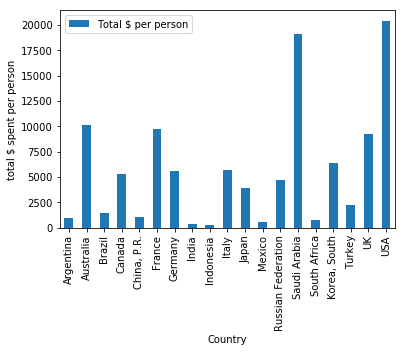

In [26]:
plot_percapita(militaryspending_percapita,19)

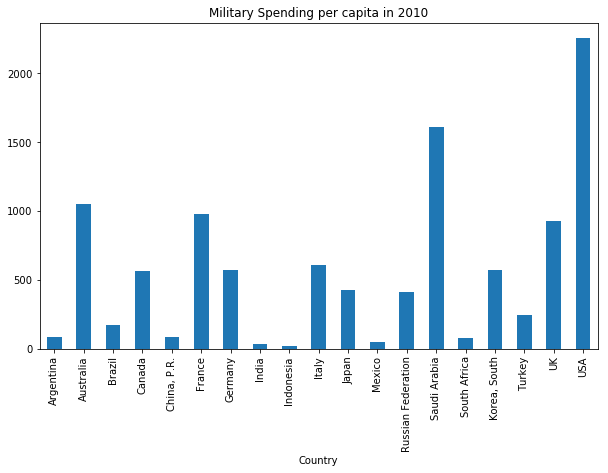

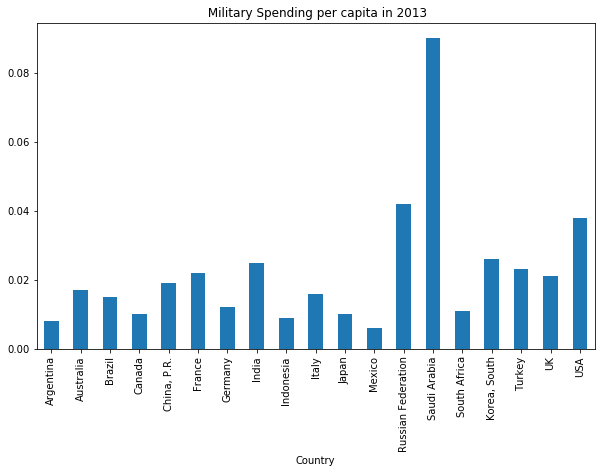

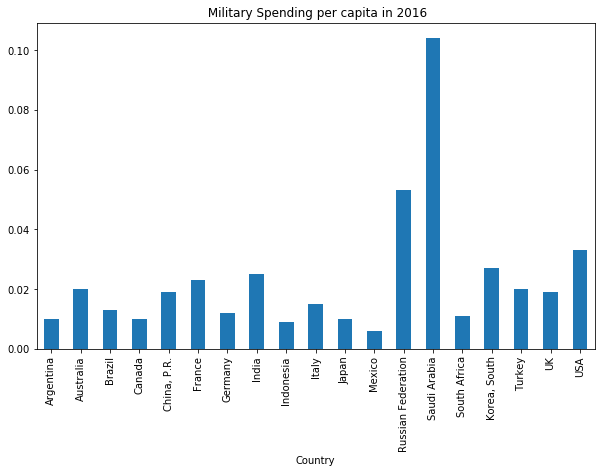

In [27]:
#Saudi Arabia beat USA in military spending per capita after 2013
militaryspending_percapita['2010'].plot(kind='bar', figsize=(10,6), stacked=False,
                                             title='Military Spending per capita in 2010')
plt.show()

Share_ofGDP['2013'].plot(kind='bar', figsize=(10,6), stacked=False,
                                             title=' Military Spending per capita in 2013')
plt.show()

Share_ofGDP['2016'].plot(kind='bar', figsize=(10,6), stacked=False,
                                             title=' Military Spending per capita in 2016')
plt.show()

In [28]:
#Filtering required data from per person GDP
percapita_of_gdp_filtered=gdp_percapita.filter(years_filter)
gdp_perperson=percapita_of_gdp_filtered.filter(country_filter,axis=0)

gdp_perperson.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
"GDP per capita, current prices (U.S. dollars per capita)",,,,,,,,,,
Argentina,7315.726,9146.79,8337.811,10412.945,12787.806,13889.792,14488.829,13208.832,14643.922,12493.909
Australia,45162.748,49223.865,45603.957,56360.354,66773.109,68048.291,64733.892,61231.972,51220.037,51737.228
Brazil,7374.775,8854.994,8625.13,11298.413,13242.687,12366.951,12294.596,12111.736,8810.496,8726.901
Canada,44599.148,46660.868,40831.097,47512.679,52143.843,52577.385,52494.129,50509.592,43349.618,42224.939
"China, P.R.",2703.003,3467.03,3837.903,4524.055,5582.887,6329.464,7080.828,7701.691,8166.756,8123.256


In [29]:
#converting the data to float
for year in years_filter:
    gdp_perperson[year] = gdp_perperson[year].astype('float') 

gdp_perperson.head(5)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
"GDP per capita, current prices (U.S. dollars per capita)",,,,,,,,,,
Argentina,7315.73,9146.79,8337.81,10412.94,12787.81,13889.79,14488.83,13208.83,14643.92,12493.91
Australia,45162.75,49223.86,45603.96,56360.35,66773.11,68048.29,64733.89,61231.97,51220.04,51737.23
Brazil,7374.77,8854.99,8625.13,11298.41,13242.69,12366.95,12294.60,12111.74,8810.50,8726.90
Canada,44599.15,46660.87,40831.10,47512.68,52143.84,52577.39,52494.13,50509.59,43349.62,42224.94
"China, P.R.",2703.00,3467.03,3837.90,4524.06,5582.89,6329.46,7080.83,7701.69,8166.76,8123.26


In [30]:
#Now to compare military spending per capita and per person gdp for the year 2016
#combine the two dataframes and extract the relevant info
data = [militaryspending_percapita['2016'],gdp_perperson['2016']]
result=pd.concat(data, axis=1, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
result.columns.values[0]='Military Spending per capita'
result.columns.values[1]='GDP per person'
result

,Military Spending per capita,GDP per person
Argentina,118.80,12493.91
Australia,1012.70,51737.23
Brazil,113.00,8726.90
Canada,417.80,42224.94
"China, P.R.",155.70,8123.26
France,862.40,38177.86
Germany,509.30,42176.85
India,42.10,1741.65
Indonesia,31.40,3604.29
Italy,467.40,30507.18


In [31]:
#plot the comparision
def plot_comparison(result, limit=19):
    result = result.ix[:,['Military Spending per capita', 'GDP per person']][:limit]
    result.plot(kind='line', stacked=True, sort_columns=True)
    plt.ylabel('Comparison of per person military spending to the per person GDP')
    plt.show()


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



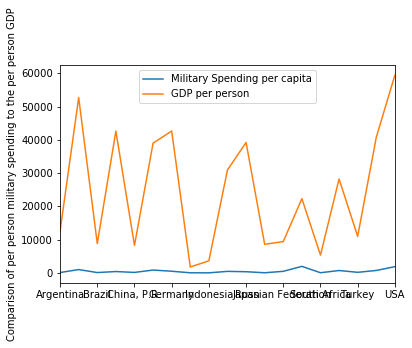

In [32]:
plot_comparison(result,19)